# Case - Google Jobs 2018
    Candidato: Rodrigo Didier
    Vaga: Data Analyst
    
# Sobre a base de dados:
   ### Variáveis contidas:
       - Company: Companhia que oferece a vaga.
       - Title: Título da vaga.
       - Category: Categoria da vaga.
       - Location: Local da vaga (País/estado/cidade).
       - Responsibilities: Responsabildades associadas à vaga.
       - Minimum Qualifications: Qualificações mínimas para a vaga.
       - Preferred Qualifications: Qualificações preferidas à vaga.

# PRÉ-PROCESSAMENTO
## Vamos inicialmente verificar se há inconscistências no dataset e limpá-lo conforme for necessário.

In [1]:
#import libs
import pandas as pd
import numpy as np
from collections import Counter
import unidecode as unc
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /home/didier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/didier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/didier/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/didier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Read labels file
df_jobs = pd.read_excel("job_skills.xlsx")

In [3]:
df_jobs.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [4]:
#Descrevendo o dataset
df_jobs.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...
freq,1227,35,168,190,33,32,32


In [5]:
# Identificando missing values - isna == isnull no pandas.
df_jobs.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [92]:
#Removendo NaN da análise
df_jobs = df_jobs.dropna()

#Descrevendo o dataset limpo
df_jobs.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Country
count,1235,1235,1235,1235,1235,1235,1235,1235
unique,2,779,23,91,801,806,820,49
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver...",United States
freq,1212,35,168,187,33,32,32,624


In [9]:
#Verificando quais as companhias que estão oferecendo jobs
df_job_company = df_jobs.groupby(["Company"]).size().reset_index().rename(columns = {0: 'Job Offers'}).sort_values(by=["Job Offers"],ascending= False).set_index('Company')
 

In [10]:
df_job_company

,Job Offers
Company,
Google,1212
YouTube,23


Embora o YouTube seja uma companhia do Google, acredito que o perfil
das vagas deva ser diferente. Por tanto, vamos removê-las.

In [11]:
#Removendo as vagas para o Youtube da análise (perfil diferente)
df_jobs = df_jobs[df_jobs["Company"] != "Youtube"]

#### 1. Quais são os países com mais vagas anunciadas pela Google? 
#### Como você construiria um gráfico que demonstre o resultado da   contagem?

Não temos uma coluna específica para o país de origem então teremos que obtê-lo à partir da variável Location.

Para construir o gráfico vamos olhar a distribuição dos nossos dados e escolher a amostra e o tipo de gráfico mais adequado ao contexto.

In [12]:
#Criando a variável country à partir da variável Location
df_jobs["Country"] = df_jobs["Location"].apply(lambda x: x.split(",")[-1])

In [94]:
#Agrupando por Country
df_job_country = df_jobs.groupby(["Country"]).size().reset_index().rename(columns = {0: 'Job Offers'}).sort_values(by=["Job Offers"],ascending= True).set_index('Country')

#### Descrevendo a distribuição de ofertas por país para definir qual amostra dos nossos dados vamos exibir no gráfico. 
    -> Vamos exibir os dados que pertencem a pelo menos o 4ºQuatil.

In [14]:
df_job_country.describe()

,Job Offers
count,49.000000
mean,25.204082
std,89.158796
min,1.000000
25%,2.000000
50%,5.000000
75%,15.000000
max,624.000000


In [15]:
df_job_country_max = df_job_country[df_job_country["Job Offers"] >= 15].sort_values(by=["Job Offers"],ascending= True)
df_job_country_max.sort_values(by=["Job Offers"],ascending= False)

,Job Offers
Country,
United States,624
Ireland,87
United Kingdom,62
Germany,53
Singapore,41
China,38
Australia,35
Japan,31
Taiwan,30


* Podemos observar que há 15 vagas para o Brasil. (questão 2.)

Text(0.5, 0, 'Absolute Frequency')

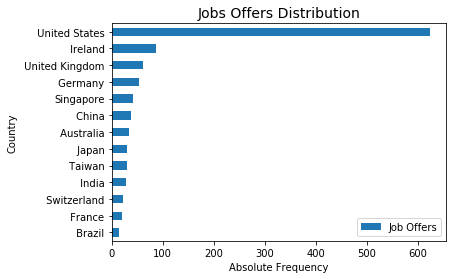

In [16]:
ax1 = df_job_country_max.plot.barh()  
plt.title('Jobs Offers Distribution',fontsize=14)
plt.xlabel('Absolute Frequency')

#### 3. Quais são as qualificações mínimas e desejáveis que o Google mais exige?
    Vamos ver quais os graus de formação acadêmica mínimos e preferidos pelo Google além de realizar uma análise das palavras mais significantes em cada caso. Será que separando elas morfologicamente, conseguimos alguma informação interessante? Vamos descobrir.
    
    Para ter uma maior precisão nos resultados que vamos obter, a estratégia inicial foi limpar todo o texto das variáveis em análise e depois trabalhar apenas com aquelas que forem mais frequentes.

In [18]:
#Função para limpar todas as listas contidas nas lista de frases
def clean_list (list_clean):
    list_all_clean_words = []
    punc = '.,;\"()-&'
    for j in punc:
        list_clean = [i.replace(j,'').lower() for i in list_clean]
    for palavra in list_clean:
        list_all_clean_words.append(unc.unidecode(palavra))
    return (list_all_clean_words)

#def split_list_by_words (list_all_clean_words)
def split_list_words (list_all_clean):
    list_words = []
    for linha in list_all_clean:
        for termo in linha.split():
            list_words.append(termo)
    return (list_words)

In [71]:
#Criando lista de Minimum Qualification  (list_minq)
list_minq = list(df_jobs["Minimum Qualifications"])

#Criando lista de Preferred Qualification (list_prefq)
list_prefq = list(df_jobs["Preferred Qualifications"])

#Criando lista de Responsibilities (list_prefq)
list_respon = list(df_jobs["Responsibilities"])

In [72]:
#Criando lista de palavras à partir de list_minq, list_prefq e Renspons...
list_minq_clean = []
list_prefq_clean = []
list_respon_clean = []
list_minq_clean = clean_list(list_minq)
list_prefq_clean = clean_list(list_prefq)
list_respon_clean = clean_list(list_respon)

In [73]:
#Criando lista limpa com todas as palavras
list_all_clean_words_minq = []
list_all_clean_words_prefq = []
list_all_clean_words_respon = []
list_all_clean_words_minq = split_list_words(clean_list(list_minq_clean))
list_all_clean_words_prefq = split_list_words(clean_list(list_prefq_clean))
list_all_clean_words_respon = split_list_words(clean_list(list_respon_clean))

In [74]:
#Criando lista de stop words
stop_words = stopwords.words('english')

#Função que transforma lista em df com freq de palavras 
#(já sem stop words)
def list_to_freq_df (list_words):
    serie_words = pd.Series(list_words)
    freq_words= Counter(serie_words)
    df_freq_words = pd.DataFrame.from_dict(freq_words, orient='index').reset_index()
    df_freq_words=df_freq_words.sort_values(by=[0],ascending= False).rename(columns = {0: 'freq', 'index':'word'})
    df_freq_words = df_freq_words.set_index('word')
    df_freq_words_clean = df_freq_words[~df_freq_words.index.isin(stop_words)]
    df_freq_words_clean.reset_index(level=0, inplace=True)
    return(df_freq_words_clean)

In [75]:
#Df com freq por word - full
df_freq_words_clean_minq = list_to_freq_df(list_all_clean_words_minq)
df_freq_words_clean_prefq = list_to_freq_df(list_all_clean_words_prefq)
df_freq_words_clean_respon = list_to_freq_df(list_all_clean_words_respon)

Vamos verificar a distribuição dos df obtidos.
Isso nos ajudará a saber com qual parte dele vamos trabalhar.

In [95]:
#Verificando a distribuição de freq das palavras limpas da variável
# Minimal Qualifications:
df_freq_words_clean_minq.describe()

,freq
count,2133.000000
mean,15.249414
std,86.096087
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,3032.000000


In [25]:
#Verificando a distribuição de freq das palavras limpas da variável
# Preferred Qualifications:
df_freq_words_clean_prefq.describe()

,freq
count,3514.000000
mean,16.471827
std,71.386257
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,2302.000000


In [96]:
#Verificando a distribuição de freq das palavras limpas da variável
# Responsibilites:
df_freq_words_clean_respon.describe()

,freq
count,4241.000000
mean,17.685452
std,57.411779
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,1207.000000


In [77]:
#Como queremos as principais,
#selecionado todas as palavras do 4º quartil.
df_top_freq_words_minq = df_freq_words_clean_minq[df_freq_words_clean_minq["freq"] >= 7]
df_top_freq_words_prefq = df_freq_words_clean_prefq[df_freq_words_clean_prefq["freq"] >= 9]
df_top_freq_words_respon = df_freq_words_clean_respon[df_freq_words_clean_respon["freq"] >= 9]

* Ideia que pode ser explorada: Pergar n-uplas (2a2, 3a3, etc...) pois muitas palavras contém mais informações quando estão agrupadas.

In [78]:
#Vamos verificar como está o mínimo do nível de formação esperado e
#a formação preferida esperada.
degree = ["ba/bs", "ba","bs","bachelor's","master","master's","phd"]

#redefinindo a variável word como index
df_freq_degree_minq = df_top_freq_words_minq.rename(columns = {'word':'minimal degree'}).set_index("minimal degree")
df_freq_degree_minq = df_freq_degree_minq[df_freq_degree_minq.index.isin(degree)]
df_freq_degree_prefq = df_top_freq_words_prefq.rename(columns = {'word':'preferred degree'}).set_index("preferred degree")
df_freq_degree_prefq = df_freq_degree_prefq[df_freq_degree_prefq.index.isin(degree)]


,freq
minimal degree,
ba/bs,829
bachelor's,164
master's,52
bs,44
master,29
phd,9


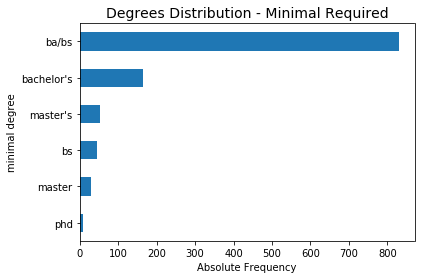

In [79]:
#Qualificações mínimas desejadas pelo Google
df_freq_degree_minq.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
plt.title('Degrees Distribution - Minimal Required',fontsize=14)
plt.xlabel('Absolute Frequency')
df_freq_degree_minq



,freq
preferred degree,
master's,157
phd,74
ba/bs,19


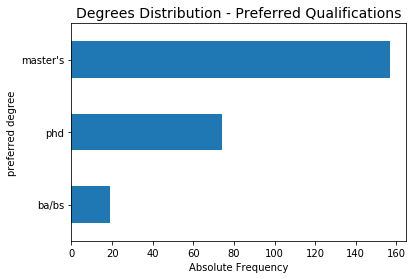

In [80]:
#Qualificações preferidas desejadas pelo Google
df_freq_degree_prefq.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
plt.title('Degrees Distribution - Preferred Qualifications',fontsize=14)
plt.xlabel('Absolute Frequency')
df_freq_degree_prefq

* ter um bacharel em ciências ou Artes é a formação mínima mais comum para conseguir um emprego no Google. A maioria dos cargos prefere que você tenha MBA, Master ou PhD.

In [81]:
# Função para criar tokens das palavras
def tokenizer_text (df_freq_words_clean):
    text = ' '.join(list(df_freq_words_clean["word"]))
    tokens = word_tokenize(text)
    list_pos_tag = nltk.pos_tag(tokens)
    return (list_pos_tag)

In [82]:
#Criando lista tokenizada minq e prefq
list_tokenized_minq = tokenizer_text(df_top_freq_words_minq)
list_tokenized_prefq = tokenizer_text(df_top_freq_words_prefq)
list_tokenized_respon = tokenizer_text(df_top_freq_words_respon)

In [83]:
#Transformando a lista de tuplas em dataframe
df_morph_by_word_minq = pd.DataFrame.from_dict(list_tokenized_minq).rename(columns = {0:'word', 1:'morphology'}).set_index('morphology')
df_morph_by_word_prefq = pd.DataFrame.from_dict(list_tokenized_prefq).rename(columns = {0:'word', 1:'morphology'}).set_index('morphology')
df_morph_by_word_respon = pd.DataFrame.from_dict(list_tokenized_respon).rename(columns = {0:'word', 1:'morphology'}).set_index('morphology')

In [84]:
#Criando funções para análise com NLP
def joins_morphologically (pos_tags_list, df_morph_by_word):
    words = list(df_morph_by_word[df_morph_by_word.index.isin(pos_tags_list)]["word"])
    return (' '.join(words))

#Plota gráfico: nuvem de palavras
def plot_word_cloud (join_morph, title, size_title):
    wc = WordCloud(background_color="white").generate(join_morph)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=10, y=0)
    plt.title(title,size=size_title)

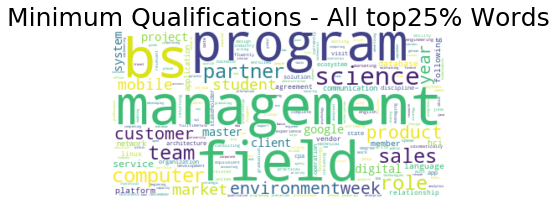

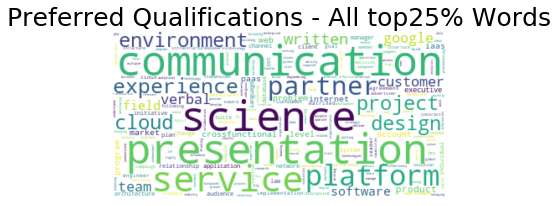

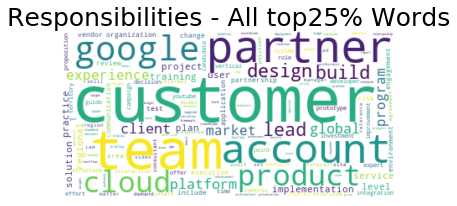

In [85]:
plot_word_cloud(' '.join(list(df_top_freq_words_minq["word"])),'Minimum Qualifications - All top25% Words',25)
plot_word_cloud(' '.join(list(df_top_freq_words_prefq["word"])),'Preferred Qualifications - All top25% Words',25)
plot_word_cloud(' '.join(list(df_top_freq_words_respon["word"])),'Responsibilities - All top25% Words',25)

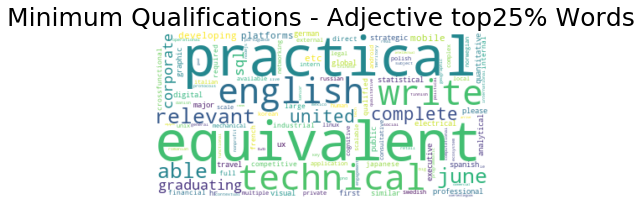

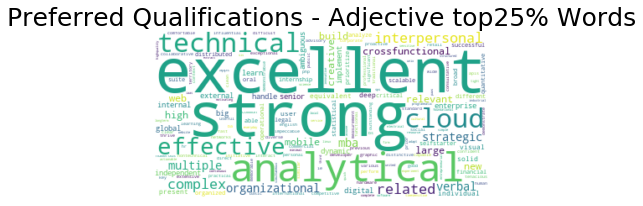

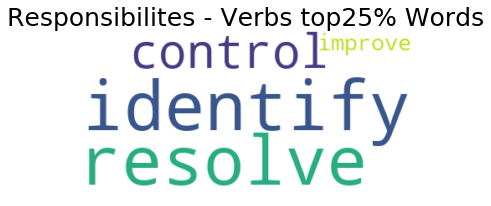

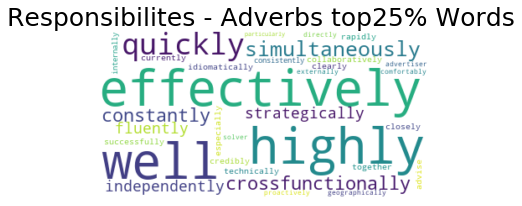

In [90]:
plot_word_cloud(joins_morphologically(['JJ'],df_morph_by_word_minq),'Minimum Qualifications - Adjective top25% Words',25)
plot_word_cloud(joins_morphologically(['JJ'],df_morph_by_word_prefq),'Preferred Qualifications - Adjective top25% Words',25)
plot_word_cloud(joins_morphologically(['VB'],df_morph_by_word_prefq),'Responsibilites - Verbs top25% Words',25)
plot_word_cloud(joins_morphologically(['RB'],df_morph_by_word_prefq),'Responsibilites - Adverbs top25% Words',25)

#### 4. Quais skills de programação são mais pedidas nas vagas do Google?

In [36]:
#Criando lista com as skills de prog identificadas analisando a lista 
#de palavras e vendo listas na internet com linguagens mais usadas em 2018
programinng_skills = ['cloud','html5','c++','sas','python', 'java', 'c','c#','php', 'javascript', 'r', 'ruby', 'perl','sql', 'html']

#Criando df com freq de prog skill (minimal and preferred)
df_freq_prog_skills_minq = df_top_freq_words_minq.rename(columns = {'word':'Skills'}).set_index("Skills")
df_freq_prog_skills_minq = df_freq_prog_skills_minq[df_freq_prog_skills_minq.index.isin(programinng_skills)]
df_freq_prog_skills_prefq = df_top_freq_words_prefq.rename(columns = {'word':'Skills'}).set_index("Skills")
df_freq_prog_skills_prefq = df_freq_prog_skills_prefq[df_freq_prog_skills_prefq.index.isin(programinng_skills)]

In [37]:
#função para plotar gráfico de programming skill
def plot_prog_skills (df_freq_prog_skills, title, font_size):
    df_freq_prog_skills.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
    plt.title(title,fontsize= font_size)
    plt.xlabel('Absolute Frequency')


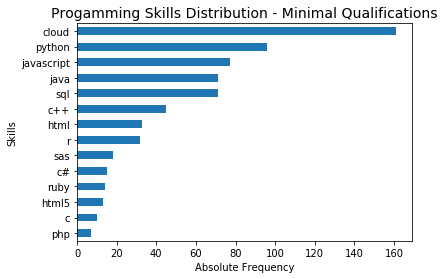

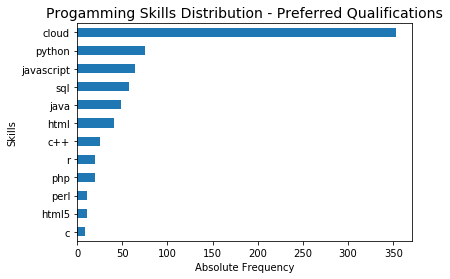

In [38]:
plot_prog_skills(df_freq_prog_skills_minq, 'Progamming Skills Distribution - Minimal Qualifications', 14)
plot_prog_skills(df_freq_prog_skills_prefq, 'Progamming Skills Distribution - Preferred Qualifications', 14)


Text(0.5, 0, 'Absolute Frequency')

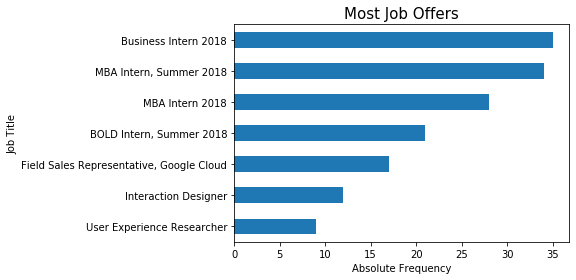

In [67]:
#Verificando os jobs com mais ofertas pelo Google
df_freq_job_title = pd.DataFrame.from_dict(Counter(df_jobs["Title"]), orient='index').reset_index()
df_freq_job_title=df_freq_job_title.sort_values(by=[0],ascending= False).rename(columns = {0: 'freq', 'index':'Job Title'})
df_freq_job_title = df_freq_job_title.set_index('Job Title')
df_top_freq_job_title = df_freq_job_title[df_freq_job_title["freq"] >= 9]
df_top_freq_job_title.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
plt.title("Most Job Offers",fontsize= 15)
plt.xlabel('Absolute Frequency')

Text(0.5, 0, 'Absolute Frequency')

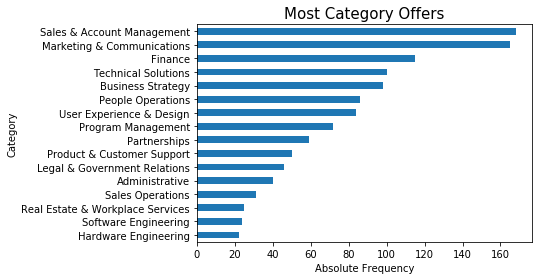

In [68]:
#Verificando as categorias de jobs com mais ofertas pelo Google
df_freq_job_title = pd.DataFrame.from_dict(Counter(df_jobs["Category"]), orient='index').reset_index()
df_freq_job_title=df_freq_job_title.sort_values(by=[0],ascending= False).rename(columns = {0: 'freq', 'index':'Category'})
df_freq_job_title = df_freq_job_title.set_index('Category')
df_top_freq_job_title = df_freq_job_title[df_freq_job_title["freq"] >= 20]
df_top_freq_job_title.sort_values(by=["freq"],ascending= True).plot.barh(y = 'freq',legend=False)
plt.title("Most Category Offers",fontsize= 15)
plt.xlabel('Absolute Frequency')

# As questões 5 e 6 serão abordadas na conversa presencial sobre o case e levarão em conta todas as análises realizadas até aqui.